In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.2846 - loss: 1.9067 - val_accuracy: 0.5166 - val_loss: 1.3472
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.5052 - loss: 1.3747 - val_accuracy: 0.5717 - val_loss: 1.1922
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.5761 - loss: 1.1961 - val_accuracy: 0.6226 - val_loss: 1.0714
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6249 - loss: 1.0634 - val_accuracy: 0.6412 - val_loss: 1.0132
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6596 - loss: 0.9814 - val_accuracy: 0.6755 - val_loss: 0.9273
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.6841 - loss: 0.9094 - val_accuracy: 0.6865 - val_loss: 0.8974
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.7065 - loss: 0.8428 - val_accuracy: 0.7026 - val_loss: 0.8616
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.7253 - loss: 0.7937 - 

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7333 - loss: 0.8468
Test Accuracy: 73.08%


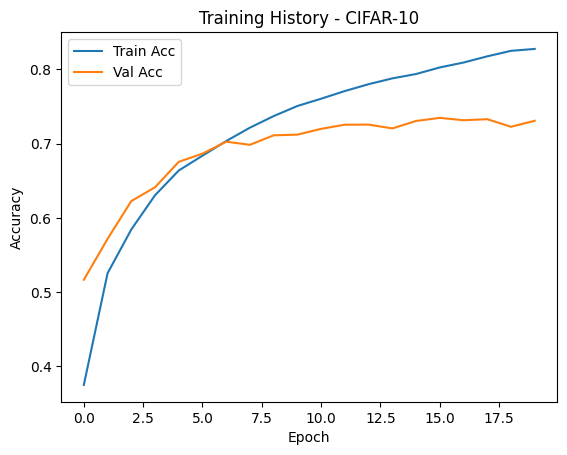

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History - CIFAR-10')
plt.show()
